In [1]:
!ls

allbut.pl    u1.base  u3.base  u5.base	ub.base  u.info
mku.sh	     u1.test  u3.test  u5.test	ub.test  u.item
README	     u2.base  u4.base  ua.base	u.data	 u.occupation
sample_data  u2.test  u4.test  ua.test	u.genre  u.user


In [3]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [6]:
#ua.base -> train data
#ua.test -> test data
train =  pd.read_csv("ua.base", sep="\t", names =['user','movie','rating','timestamp'])
test = pd.read_csv("ua.test", sep="\t", names = ['user','movie','rating','timestamp'])

In [7]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])


In [8]:
ratings_test

tensor([4., 4., 4.,  ..., 1., 4., 2.])

In [21]:
rank = 50 # vector 차원
numItems = items.max() + 1 #사용자 수
numUsers = users.max() + 1 #아이템 수
P = torch.randn(numItems, rank, requires_grad=True) #아이템 매트릭스
Q = torch.randn(numUsers, rank, requires_grad=True) #사용자 매트릭스

In [12]:
optimizer = torch.optim.Adam([P, Q], lr = 0.1)
for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim = 1)
  cost = F.mse_loss(hypothesis, ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))
  

epoch: 0, cost: 62.934055
epoch: 100, cost: 0.213502
epoch: 200, cost: 0.123270
epoch: 300, cost: 0.090182
epoch: 400, cost: 0.073135
epoch: 500, cost: 0.062866
epoch: 600, cost: 0.056109
epoch: 700, cost: 0.051288
epoch: 800, cost: 0.047696
epoch: 900, cost: 0.044961


In [13]:
print(train)
print(torch.sum(P[1] * Q[2]))

       user  movie  rating  timestamp
0         1      1       5  874965758
1         1      2       3  876893171
2         1      3       4  878542960
3         1      4       3  876893119
4         1      5       3  889751712
...     ...    ...     ...        ...
90565   943   1047       2  875502146
90566   943   1074       4  888640250
90567   943   1188       3  888640250
90568   943   1228       3  888640275
90569   943   1330       3  888692465

[90570 rows x 4 columns]
tensor(4.0333, grad_fn=<SumBackward0>)


In [22]:
x = []
y = []
optimizer = torch.optim.Adam([P, Q], lr = 0.1)
for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim = 1)
  cost = F.mse_loss(hypothesis, ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  x.append(epoch)
  y.append(cost)
  #if epoch % 100 == 0:
    #print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))
  

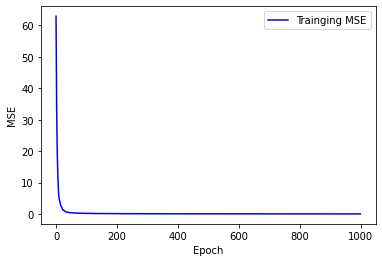

In [23]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x,y ,c="b", label = "Trainging MSE")
plt.legend()
plt.show()

In [16]:
rank = 50
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

x = []
y = []
y_test = []
optimizer = torch.optim.Adam([P, Q], lr = 0.1)
for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim = 1)
  cost = F.mse_loss(hypothesis, ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim = 1)
    cost_test =  F.mse_loss(hypo_test, ratings_test)

    x.append(epoch)
    y.append(cost)
    y_test.append(cost_test.item())
  #if epoch % 100 == 0:
    #print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

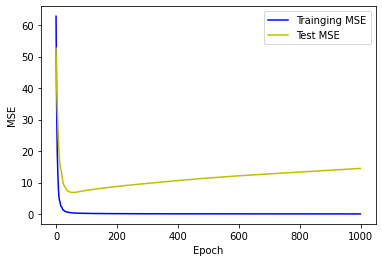

In [17]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x,y ,c="b", label = "Trainging MSE")
plt.plot(x,y_test ,c="y", label = "Test MSE")
plt.legend()
plt.show()

In [24]:
#Regularization 추가

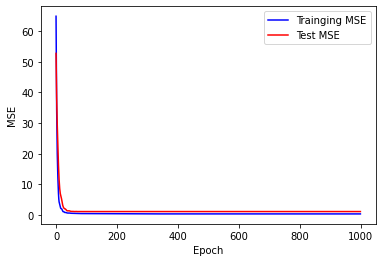

In [18]:
rank = 50
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

lamda1 = 0.0001
lamda2 = 0.0001

x = []
y = []
y_test = []
optimizer = torch.optim.Adam([P, Q], lr = 0.1)
for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim = 1)
  cost = F.mse_loss(hypothesis, ratings)
  loss = cost + lamda1 * torch.sum(P**2) + lamda2 * torch.sum(Q**2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim = 1)
    cost_test =  F.mse_loss(hypo_test, ratings_test)

    x.append(epoch)
    y.append(cost)
    y_test.append(cost_test.item())

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x,y ,c="b", label = "Trainging MSE")
plt.plot(x,y_test ,c="r", label = "Test MSE")
plt.legend()
plt.show()

In [25]:
#bias 추가

epoch: 0, cost: 104.809227
epoch: 100, cost: 0.321648
epoch: 200, cost: 0.295836
epoch: 300, cost: 0.289185
epoch: 400, cost: 0.286912
epoch: 500, cost: 0.286010
epoch: 600, cost: 0.285585
epoch: 700, cost: 0.285353
epoch: 800, cost: 0.285214
epoch: 900, cost: 0.285126


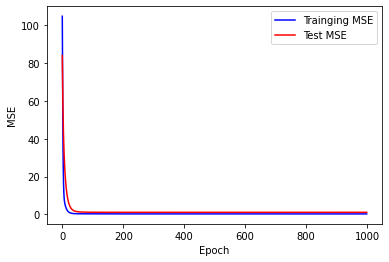

In [20]:
rank = 100
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

lamda1 = 0.0001
lamda2 = 0.0001
lamda3 = 0.001
lamda4 = 0.001

bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()

x = []
y = []
y_test = []
optimizer = torch.optim.Adam([P, Q], lr = 0.1)
for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim = 1) + \
    mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(hypothesis, ratings)
  loss = cost + lamda1 * torch.sum(P**2) + lamda2 * torch.sum(Q**2) + \
    lamda3 + torch.sum(bias_item ** 2) + torch.sum(bias_user ** 2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim = 1)+ \
     mean + bias_item[items_test] + bias_user[users_test]
    cost_test =  F.mse_loss(hypo_test, ratings_test)

    x.append(epoch)
    y.append(cost)
    y_test.append(cost_test.item())
  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x,y ,c="b", label = "Trainging MSE")
plt.plot(x,y_test ,c="r", label = "Test MSE")
plt.legend()
plt.show()